In [102]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import pandas as pd
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn import preprocessing

In [79]:
df = pd.read_excel('/home/isaac/Fundamentals_of_Data_Science_Certificate/3251 - Stats/A6/Module6_Exercise.xlsx')

In [80]:
df.head(5)

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903


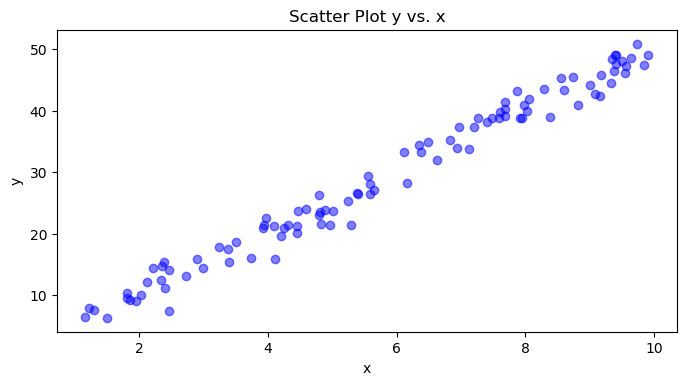

In [81]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(df["x"],df["y"],alpha=0.5, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot y vs. x')
plt.show()

Yes, linear model is appropriate since data follows a linear trend. There don't seem to be any outliers.

In [82]:
model = ols("y ~ x - 1", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.794e+04
Date:                Sun, 28 Oct 2018   Prob (F-statistic):          3.31e-123
Time:                        18:01:06   Log-Likelihood:                -206.17
No. Observations:                 100   AIC:                             414.3
Df Residuals:                      99   BIC:                             416.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              5.0184      0.030    167.166      0.0

Wow, the model fits the data really well. We have high R^2 (almost one), Skew that is nearly 0, Kurtosis near 3, Prob of F-statistic less than 0.05. We don't reject the Null Hypothesis for the intercept and therefore we shall drop it from our model. We reject the null hypothesis for "x" since it less than 0.05 and therefore we keep it.

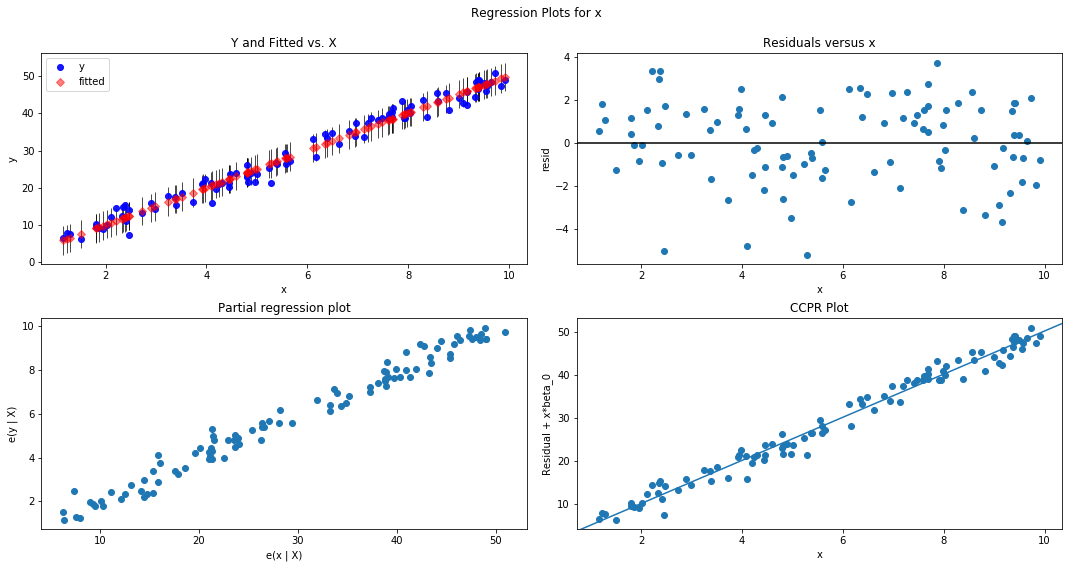

In [83]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "x", fig=fig)

# Do a graphical analysis (plot histogram of residuals and residuals vs predictor)

Text(0.5,0,'Person residuals')

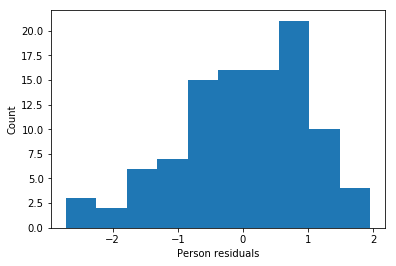

In [84]:
plt.hist(model.resid_pearson, bins = 10)
plt.ylabel('Count')
plt.xlabel('Person residuals')

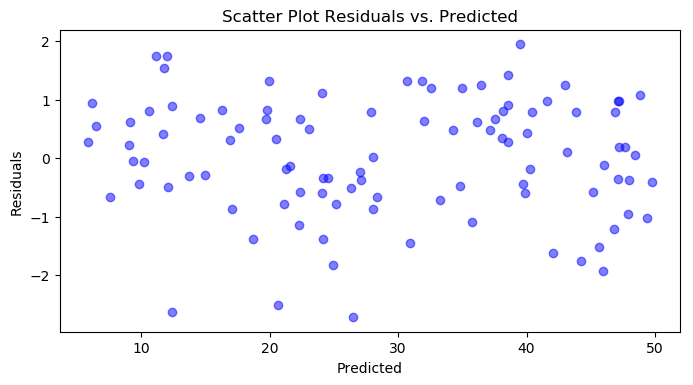

In [85]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(model.predict(df["x"]),model.resid_pearson,alpha=0.5, color='blue')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Scatter Plot Residuals vs. Predicted')
plt.show()
plt.show()

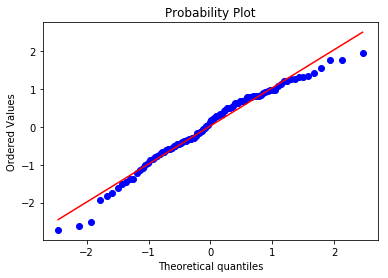

In [86]:
stats.probplot(model.resid_pearson, dist="norm", plot=pylab)
pylab.show()

# Check the assumptions

1. From scatter plot of y vs x, data seems to be linear.

2. Data seems to be Normally Distributed and cetred at 0 although with a slight skew to the left. And indeed, Skew = -0.536.

3. The variability of the residuals is not constant along the whole range as can be seen from the Residuals vs Predicted. Residuals vs Predicted don't follow a linear pattern.

4. The observations are independent since the Durbin-Watson value is close to 2. Additionally, residuals don't follow some sort of a determined pattern.

# Let's transform the data

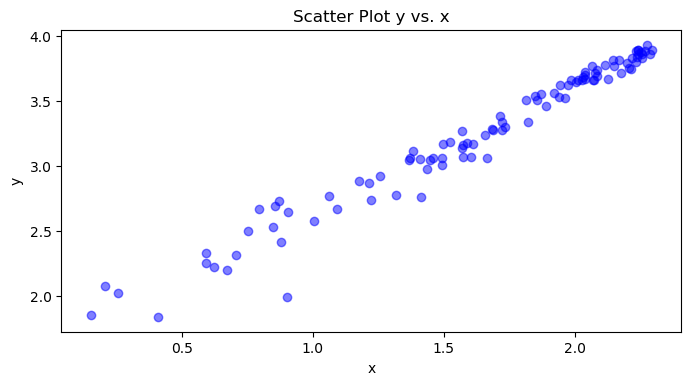

In [96]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(df["x"].apply(np.log),df["y"].apply(np.log),alpha=0.5, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot y vs. x')
plt.show()

In [97]:
model = ols("y ~ x", data=df.apply(np.log)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2817.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):           5.19e-74
Time:                        20:36:26   Log-Likelihood:                 87.422
No. Observations:                 100   AIC:                            -170.8
Df Residuals:                      98   BIC:                            -165.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6611      0.032     52.711      0.0

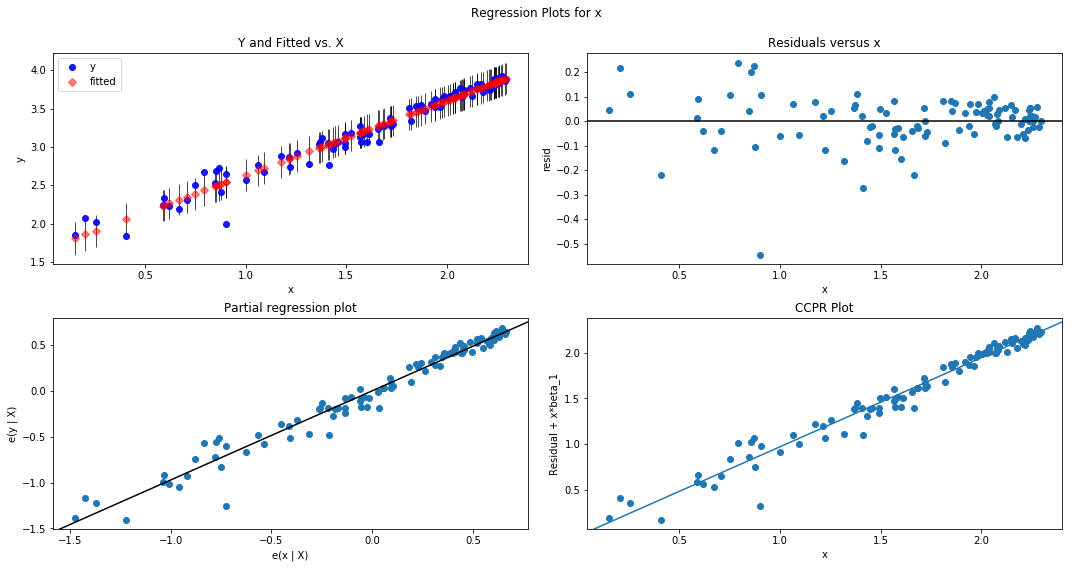

In [98]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "x", fig=fig)

WOW! Log transformation helps with a variability of residuals a lot! They now follow a linear pattern.

Text(0.5,0,'Person residuals')

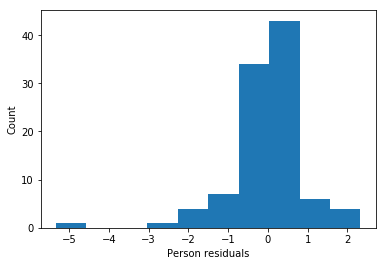

In [99]:
plt.hist(model.resid_pearson, bins = 10)
plt.ylabel('Count')
plt.xlabel('Person residuals')

But now, the residuals don't follow a normal distribution as it is highly skewed to the right.

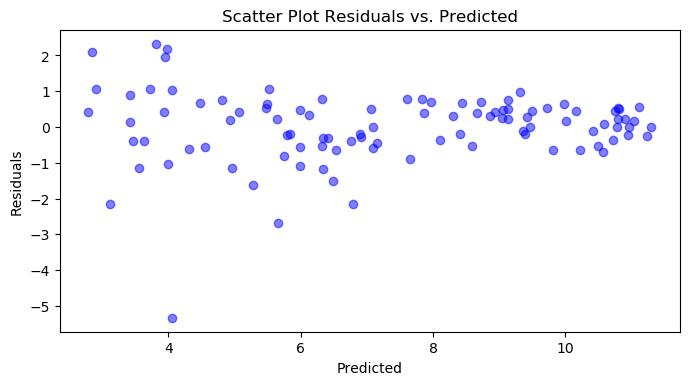

In [100]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(model.predict(df["x"]),model.resid_pearson,alpha=0.5, color='blue')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Scatter Plot Residuals vs. Predicted')
plt.show()
plt.show()

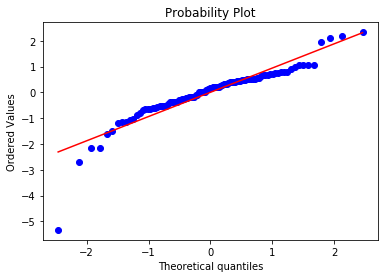

In [101]:
stats.probplot(model.resid_pearson, dist="norm", plot=pylab)
pylab.show()

# Check the assumptions

1. From scatter plot of y vs x, data seems to be linear.

2. Residuals seem to be normally distributed and centred at 0 although skewed to the left.

3. The variability of the residuals seems to be almost linear.

4. The observations are independent since the Durbin-Watson value is close to 2. Additionally, residuals don't follow some sort of a determined pattern.

In short, log-transformed data seems to be a better fit.

# Let's try other transformations.

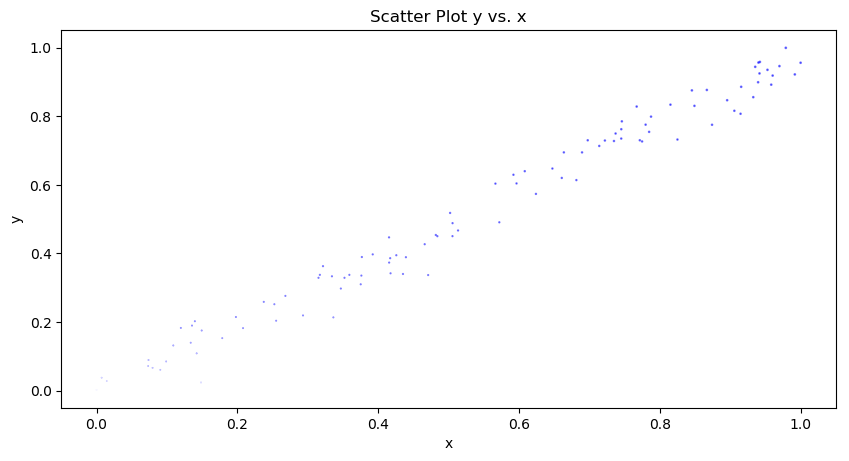

In [129]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)

x = df_normalized[1]
y = df_normalized[0]

plt.figure(figsize=(10,5),dpi=100)
plt.scatter(x, y,y,alpha=0.5, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot y vs. x')
plt.show()



In [142]:
df_normalized = df_normalized.rename(columns={0:'y', 1:'x',})

df_normalized.head(10)

,y,x
0,0.730269,0.697658
1,0.775853,0.779865
2,0.957034,0.940125
3,0.899599,0.939637
4,0.427018,0.466106
5,0.935833,0.952939
6,0.340203,0.435259
7,0.730349,0.771615
8,1.000000,0.978977
9,0.251904,0.252571


In [147]:
model = ols("y ~ x - 1", data=df_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Sun, 28 Oct 2018   Prob (F-statistic):          6.88e-115
Time:                        21:53:42   Log-Likelihood:                 173.53
No. Observations:                 100   AIC:                            -345.1
Df Residuals:                      99   BIC:                            -342.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.9695      0.007    137.648      0.0

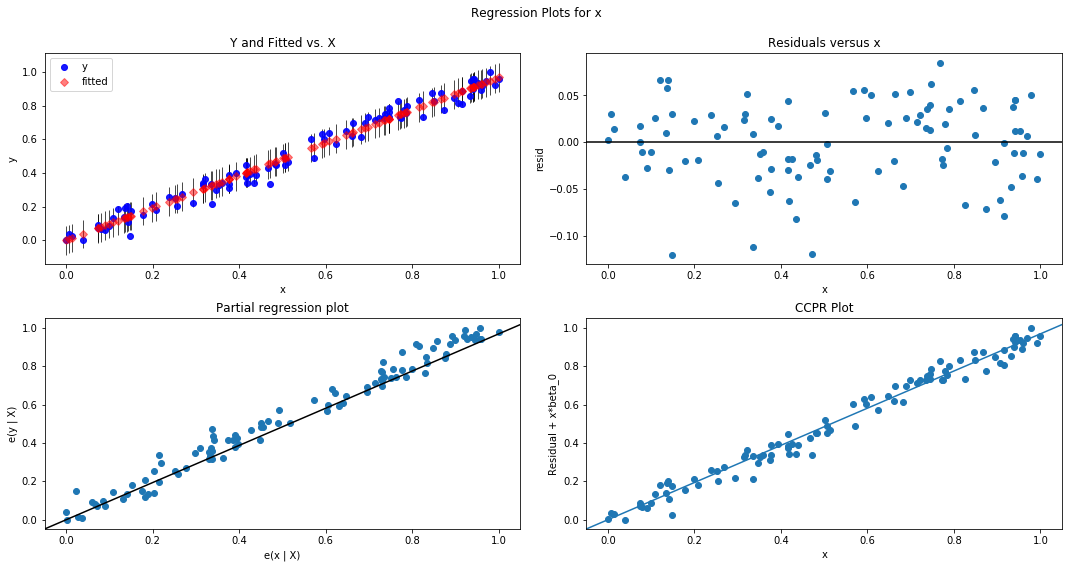

In [148]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "x", fig=fig)

Text(0.5,0,'Person residuals')

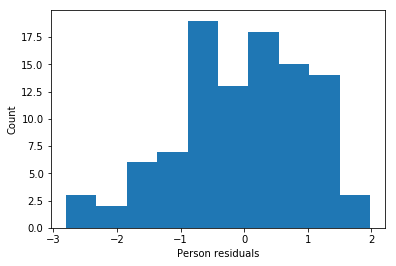

In [149]:
plt.hist(model.resid_pearson, bins = 10)
plt.ylabel('Count')
plt.xlabel('Person residuals')

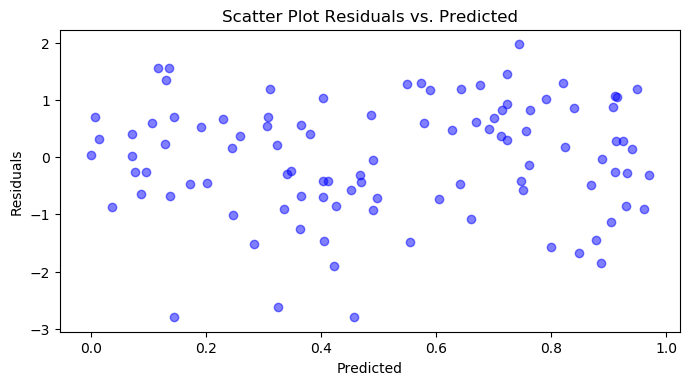

In [150]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(model.predict(df_normalized["x"]),model.resid_pearson,alpha=0.5, color='blue')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Scatter Plot Residuals vs. Predicted')
plt.show()
plt.show()